##### Main authors: WENQI HOU, GAURAVI SAHA, MANYING (JANE) TSANG
#### Repurposed with adaptations and changes from: GIOVANNI FICARRA & LEONARDO PICCHIAMI

### YELP DATA PREPROCESSING - RESTAURANT RECOMMENDATION SYSTEM 

##### CONTEXT OF THE DATA
We have chosen to pick Yelp dataset for three main reasons: 
- The data is feasible and has potential due to large volumes (3.6GB)
- Since we have gathered the information from the Yelp website, it is authentic and will help us develop practical insights. 
- The datasets include multitude of restaurants, 36 states, 1200 cities and users nationwide which enriches the quality of the data. 

### 1. Overall Project Objectives

Focusing on Las Vegas restaurants, we are implementing a high fidelity system for a user, restaurant and Yelp to transform the restaurant recommendation experience. Gather regional specific insights about our customer base, develop strategic factors that would influence a customer’s decision to visit a particular restaurant.

 - User Perspective: Trending cuisines, upscale bars, quality of restaurants to garner a wholesome experience for the customer.
 - Restaurant’s Profitability: Identifying revenue from highly reviewed users, targeted success through region specific analytics. 
 - Yelp’s Perspective: Testing Yelp’s tracking mechanism of restaurant hours, abreast with current status of restaurants (newly opened, permanently closed, etc). Develop a recommendation system for a new customer and identify the top 5 restaurants based on certain input parameters like cuisine, ambience, type of restaurant, etc.




### 2. Description of Data

5 datasets in json format retrieved from Yelp website : business.json, user.json, checkin.json, tip.json and review.json.

- business_id: ID of the business
- name: name of the business
- neighborhood
- address: address of the business
- city: city of the business
- state: state of the business
- postal_code: postal code of the business
- latitude: latitude of the business
- longitude: longitude of the business
- stars: average rating of the business
- review_count: number of reviews received
- is_open: 1 if the business is open, 0 therwise
- categories: multiple categories of the business

Review has the following attributes:

- review_id: ID of the review
- user_id: ID of the user
- business_id: ID of the business
- stars: ratings of the business
- date: review date
- text: review from the user
- useful: number of users who vote a review as usefull
- funny: number of users who vote a review as funny
- cool: number of users who vote a review as cool

User data has these variables:
- average stars
- compliment_cool, compliment_cute, compliment_funny, compliment_hot, compliment_list, compliment_more, compliment_note, compliment_photos, compliment_plain, compliment_profile, compliment_writer
- cool
- elite
- fans
- friends
- funny
- name
- review_counts
- useful
- user_id
- yelping_since

Check in has two columns: 

- business_id
- date

And the most important data for our analysis: Tip data

- business_id
- compliment_count
- date
- text
- user_id

### 3. Data Processing Tasks

#### Generating a cleaned and transformed version of the data:

1. Transfer json into pandas dataframe with proper indexing Extract data that includes restaurants in Las Vegas.
2. Replace garbage data which includes incorrect states and postal codes, etc Replace missing values. 
3. Date transformations and standardization.
4. Merge multiple dataframes and reshape.
5. Delete unnecessary columns which could add ambiguity based on logical assumptions.
6. Delete duplicate restaurants entries and combine their reviews.
7. Fix typographical errors in reviews.
8. Data discretize review counts.
9. Count user’s rating as a function of restaurants’ type and find their preference Improve the accuracy of business category by tracking ‘buzz words’ in review


### Enhancement to the Data:

We have improved and enhanced the data at every level by cleaning information within the columns. Further data cleaning and enhancements are covered in the data cleaning section.

### 4. Explanatory Data Analysis

### Data Import

We imported our large json file into dataframes by spliting each file into multiple chunks, then convert these chunks to a list, and concatenated them to a final dataframe.
After creating one dataframe, we check the columns, the shapes and the head of the dataframe to get an overall idea of what our data looks like and its features.

In [1]:
import json
import pandas as pd

In [5]:
'''
DUBBIO
Se non ho capito male, settando la chunksize leggi tutto il json dividendolo in un numero di chunk che stabilisci te per
fare operazioni su una grande quantità di dati iterativamente lavorando su una piccola parte alla volta. Ma che senso 
ha caricare tutto, dividerlo in parti, metterlo in una lista e poi rimetterlo insieme? È un discorso di efficienza di
operazioni?
'''
frames_tip = []
for chunk in pd.read_json('../dataset/yelp_academic_dataset_tip.json', lines=True, chunksize = 10000):
    frames_tip.append(chunk)
tip=pd.concat(frames_tip)

In [6]:
tip.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [7]:
tip.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [10]:
frames_checkin = []
for chunk in pd.read_json('../dataset/yelp_academic_dataset_checkin.json', lines=True, chunksize = 10000):
    frames_checkin.append(chunk)
checkin=pd.concat(frames_checkin)

In [11]:
checkin.columns

Index(['business_id', 'date'], dtype='object')

In [12]:
checkin.shape

(161950, 2)

In [13]:
checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [33]:
#Original testing size 20000
#My testing size 10

rames_review = []
for chunk in pd.read_json('../dataset/yelp_academic_dataset_review.json', lines=True, chunksize = 10):
    frames_review.append(chunk)
review=pd.concat(frames_review)

KeyboardInterrupt: 

In [ ]:
review.columns

In [ ]:
review.shape

In [ ]:
review.head()

In [18]:
frames = []
for chunk in pd.read_json('../dataset/yelp_academic_dataset_user.json', lines=True, chunksize = 10000):
    frames.append(chunk)
user = pd.concat(frames)

In [23]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [19]:
user.shape

(1637138, 22)

In [20]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [24]:
frames_business = []
for chunk in pd.read_json('../dataset/yelp_academic_dataset_business.json', lines=True, chunksize = 10000):
    frames_business.append(chunk)
business = pd.concat(frames_business)

In [25]:
business.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [26]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [27]:
business['city'].value_counts().head()

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
Name: city, dtype: int64

### Flow of Data Processing:

We started with 'business' since it contains ‘attribute’ which we can use it to extract all business at Las Vegas, and further extract restaurants based on ‘categories’ out of all business types. 
- By creating a new dataframe business_vegas_restaurant, we were able to filter 'review' table by matching its 'business_id' with 'business_id' in dataframe'business_vegas_restaurant', creating a new dataframe 'review_in_vegas'.

- Using the same logic, we then were able to filter 'user' dataframe by matching its 'user_id' with 'user_id' in 'review_in_vegas'. 

- The new dataframe 'review_in_vegas'contains all customers who have been to at least one restaurant in Las Vegas and left a review. 

- Same as the rest two dataframes, new dataframes 'tip_vegas', 'checkin_vegas' were created by matching 'business_id'

#### To avoid importing data from the large json files every time, we converted the new dataframes to pickle files for future use.

In [17]:
#business_vegas=business_vegas.reset_index(drop=True)

In [28]:
import re
business['restaurant']=business['categories'].str.contains('Restaurants',flags = re.IGNORECASE)

In [29]:
business_restaurant=business[business['restaurant'] == True]

In [30]:
business_restaurant.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,True
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,True
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,True
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,True
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True


In [31]:
business_restaurant.reset_index(drop=True).head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,True
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,True
2,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,True
3,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,True
4,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True


In [32]:
business_restaurant.shape

(59371, 15)

#### The Pickling Process

In [35]:
business_restaurant.to_pickle('restaurants.pickle')
review=review.drop('text',axis=1)

In [24]:
review_all_restaurant=review.loc[review['business_id'].isin(business_restaurant['business_id'].unique())]

In [25]:
review_all_restaurant.reset_index(drop=True).head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
0,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
1,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
2,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
3,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
4,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [26]:
review_all_restaurant.to_pickle('all_review.pickle')

In [27]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')

In [28]:
user_all_restaurant=user.loc[user['user_id'].isin(review_all_restaurant['user_id'].unique())]

In [29]:
user_all_restaurant.to_pickle('all_users.pickle')

In [30]:
tip.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [31]:
tip_all_restaurant = tip.loc[tip['user_id'].isin(review_all_restaurant['user_id'].unique())].reset_index(drop=True)

In [32]:
tip_all_restaurant.to_pickle('all_tips.pickle')

In [33]:
check_all_restaurant=checkin.loc[checkin['business_id'].isin(business_restaurant['business_id'].unique())].reset_index(drop=True)

In [34]:
check_all_restaurant.to_pickle('all_checkin.pickle')

# Data Cleaning - Making the Data useful for analysis

##### Working with Business pickle file:

This file contains information about our restaurants and other related parameters. This dataframe acts as the focus of our analysis and we intend to derive meaningful insights from it.

Summary of actions:
- Reading the business pickle file for clean up
- Missing values cleaned up
- Using only a few selected columns for meaningful analysis
- Extract useful information from categories column to investigate resturants' cuisine


In [36]:
import pandas as pd
rest = pd.read_pickle('restaurants.pickle')

In [37]:
import numpy as np
rest.fillna(value = pd.np.nan, inplace = True)

In [38]:
Rest = rest.reset_index(drop = True)
Rest.index +=1
Rest.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,restaurant
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,True
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,True
3,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,True
4,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,True
5,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,NaN,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,True


In [39]:
Rest.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state', 'restaurant'],
      dtype='object')

In [40]:
'''
DUBBIO
Lui qua esclude alcune colonne. Però:
- Non prende in considerazione city, nel suo caso è sempre las vegas. Io l'ho aggiunta, credo sia una informazione utile.
  Credo che nella predizioe, anche il di dove sia il ristorante che consigli sia utile saperlo.
'''

Rest_final = Rest[['name', 'business_id', 'address', 'categories', 'postal_code','attributes','hours','latitude','longitude','review_count','stars', 'city']]

In [41]:
'''
Ho eseguito la faccenda. Ora mi sembra che unique abbia funzionato. Prima sembrava un crash quasi.
'''

categories=', '.join(list(Rest_final['categories'].unique()))
categories=categories.split(', ')
categories[:5]

['Specialty Food', 'Restaurants', 'Dim Sum', 'Imported Food', 'Food']

In [42]:
from collections import Counter, defaultdict
c = Counter(categories)
c.most_common(60)

[('Restaurants', 31076),
 ('Food', 12519),
 ('Nightlife', 7971),
 ('Bars', 7606),
 ('American (Traditional)', 5301),
 ('Sandwiches', 4848),
 ('Breakfast & Brunch', 4195),
 ('American (New)', 3925),
 ('Burgers', 3069),
 ('Pizza', 2921),
 ('Fast Food', 2907),
 ('Coffee & Tea', 2644),
 ('Event Planning & Services', 2575),
 ('Cafes', 2428),
 ('Italian', 2392),
 ('Salad', 2255),
 ('Specialty Food', 2062),
 ('Seafood', 1942),
 ('Chinese', 1826),
 ('Chicken Wings', 1826),
 ('Mexican', 1753),
 ('Caterers', 1727),
 ('Sports Bars', 1707),
 ('Desserts', 1697),
 ('Bakeries', 1600),
 ('Asian Fusion', 1543),
 ('Canadian (New)', 1538),
 ('Pubs', 1440),
 ('Delis', 1396),
 ('Mediterranean', 1357),
 ('Japanese', 1293),
 ('Barbeque', 1280),
 ('Steakhouses', 1241),
 ('Beer', 1126),
 ('Wine & Spirits', 1126),
 ('Sushi Bars', 1072),
 ('Vegetarian', 1042),
 ('Arts & Entertainment', 1034),
 ('Cocktail Bars', 962),
 ('Middle Eastern', 944),
 ('Wine Bars', 940),
 ('Diners', 940),
 ('Lounges', 896),
 ('Juice Bar

In [43]:
'''
Qui sta aggiunge una nuova feature. Il tipo di cucina.
'''

cuisine = 'American|Chinese|Italian|Japanese|Mexican|Asian Fusion|Thai|Korean|Mediterranean'
Rest_final['cuisine']=Rest_final['categories'].str.findall(cuisine)

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
'''
Mappa ogni elemento a una lista, giustamente perche un ristorante può avere più tipi di cucina. Se non è fra
le tipologie principali, è in others.
'''

Rest_final['cuisine'] = Rest_final['cuisine'].map(lambda x: list(x))
Rest_final['cuisine'] = Rest_final['cuisine'].map(lambda x: ['Others'] if x==[] else x)

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [45]:
Rest_final['cuisine'].head(20)

1                         [Chinese]
2                        [Japanese]
3                         [Mexican]
4                         [Italian]
5                         [Italian]
6                          [Others]
7                         [Mexican]
8                          [Others]
9                          [Others]
10    [Italian, American, American]
11                        [Chinese]
12                         [Others]
13                         [Others]
14                         [Others]
15                         [Others]
16                         [Korean]
17                       [Japanese]
18                         [Others]
19                       [American]
20                        [Chinese]
Name: cuisine, dtype: object

#### Remove redundant entries (e.g: American, American)

In [46]:
Rest_final['cuisine'] = Rest_final['cuisine'].map(lambda x: list(dict.fromkeys(x)))
Rest_final['cuisine'] = Rest_final['cuisine'].map(', '.join) # convert list of string to string
Rest_final['cuisine'].head(20)

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1               Chinese
2              Japanese
3               Mexican
4               Italian
5               Italian
6                Others
7               Mexican
8                Others
9                Others
10    Italian, American
11              Chinese
12               Others
13               Others
14               Others
15               Others
16               Korean
17             Japanese
18               Others
19             American
20              Chinese
Name: cuisine, dtype: object

Check all cuisines and merge all resturants with cuisine - Asian into Asian fusion for ease.

In [47]:
Rest_final['cuisine'].unique()

array(['Chinese', 'Japanese', 'Mexican', 'Italian', 'Others',
       'Italian, American', 'Korean', 'American', 'Italian, Japanese',
       'Mediterranean', 'Thai', 'American, Asian Fusion, Mexican, Korean',
       'Chinese, Asian Fusion',
       'Chinese, Japanese, Asian Fusion, Mexican',
       'Asian Fusion, Japanese', 'Asian Fusion, Chinese',
       'Chinese, Italian', 'Italian, Mediterranean', 'American, Mexican',
       'Mexican, American', 'American, Mediterranean',
       'Korean, Asian Fusion', 'Asian Fusion, Thai',
       'Japanese, Asian Fusion', 'Asian Fusion',
       'Asian Fusion, Japanese, Korean', 'American, Italian',
       'Japanese, American', 'Japanese, Asian Fusion, Chinese',
       'Asian Fusion, Japanese, American', 'Chinese, Thai',
       'Japanese, Korean', 'Asian Fusion, Mexican', 'Korean, Thai',
       'Thai, Chinese', 'Korean, Japanese', 'Chinese, Japanese',
       'Thai, Japanese, Chinese', 'Korean, Japanese, Chinese',
       'Chinese, Asian Fusion, Japanes

In [48]:
Rest_final['cuisine'].iloc[np.where(Rest_final['cuisine'].str.contains('Asian Fusion'))]='Asian Fusion'

/home/leonardo/miniconda3/envs/machine_learning_3_7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
Rest_final['cuisine'].unique()

array(['Chinese', 'Japanese', 'Mexican', 'Italian', 'Others',
       'Italian, American', 'Korean', 'American', 'Italian, Japanese',
       'Mediterranean', 'Thai', 'Asian Fusion', 'Chinese, Italian',
       'Italian, Mediterranean', 'American, Mexican', 'Mexican, American',
       'American, Mediterranean', 'American, Italian',
       'Japanese, American', 'Chinese, Thai', 'Japanese, Korean',
       'Korean, Thai', 'Thai, Chinese', 'Korean, Japanese',
       'Chinese, Japanese', 'Thai, Japanese, Chinese',
       'Korean, Japanese, Chinese', 'Japanese, Chinese', 'Thai, Japanese',
       'American, Mediterranean, Italian', 'Mediterranean, American',
       'Japanese, Thai', 'Mediterranean, Italian', 'American, Japanese',
       'American, Chinese', 'Chinese, Korean', 'American, Thai, Chinese',
       'Korean, American', 'Mediterranean, Italian, American',
       'Italian, American, Mediterranean', 'Mexican, American, Italian',
       'Italian, Thai', 'Korean, Mexican',
       'Mediterra

#### Analysis of messy data in the attribute column:

To fix this issue where each item inside is a dictionary with values, attributes acts as a filter on Yelp that customers can click to identify the restaurant. For eg. Wifi = Yes would be selected (or tick marked) while making a selection on Yelp.

We have split the atributes column with dictionary to different filters.

In [50]:
Rest_final.isnull().sum()

name                0
business_id         0
address             0
categories          0
postal_code         0
attributes       2210
hours           13995
latitude            0
longitude           0
review_count        0
stars               0
city                0
cuisine             0
dtype: int64

In [51]:
Rest_final['attributes'].apply(pd.Series).head()
# Split the attributes dictionary into all its values

,0,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
1,NaN,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,NaN,...,NaN,False,True,2,True,True,True,NaN,NaN,u'no'
2,NaN,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,NaN,...,NaN,False,True,2,True,True,True,NaN,NaN,u'no'
3,NaN,NaN,NaN,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,...,NaN,False,True,1,False,NaN,True,NaN,NaN,u'no'
4,NaN,NaN,NaN,u'none',None,NaN,NaN,NaN,True,NaN,...,NaN,True,True,2,False,NaN,True,NaN,NaN,NaN
5,NaN,NaN,NaN,u'full_bar',"{'romantic': True, 'intimate': False, 'tourist...",NaN,'no',NaN,NaN,NaN,...,NaN,False,True,2,True,NaN,True,NaN,NaN,u'no'


#### Summary of actions:
- Concatenating the attributes to the dataframe.
- Since there are a lot of missing values in most of the columns, we have cherry-picked a few columns out of the list and included a few filters for our analysis.
- Clean up of the WiFi column.
- Clean up of the Alcohol column.

 

In [52]:
R = Rest_final['attributes'].apply(pd.Series)
list(R.columns)

[0,
 'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

In [55]:
Rest_new = pd.concat([Rest_final.drop(['attributes'], axis=1), Rest_final['attributes'].apply(pd.Series)], axis=1)
Rest_new.head()

Index([                      'name',                'business_id',
                          'address',                 'categories',
                      'postal_code',                      'hours',
                         'latitude',                  'longitude',
                     'review_count',                      'stars',
                             'city',                    'cuisine',
                                  0,           'AcceptsInsurance',
                      'AgesAllowed',                    'Alcohol',
                         'Ambience',                       'BYOB',
                      'BYOBCorkage',                 'BestNights',
                      'BikeParking',     'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards',            'BusinessParking',
                'ByAppointmentOnly',                     'Caters',
                        'CoatCheck',                    'Corkage',
              'DietaryRestrictions',                'DogsAllow

In [56]:
'''
Anche in questo caso, fra le features da considerare, ho aggiunto city.
'''

Rest_new = Rest_new[['name', 'business_id', 'address', 'cuisine', 'postal_code','hours','latitude','longitude',
                   'review_count','stars','OutdoorSeating','BusinessAcceptsCreditCards','RestaurantsDelivery',
                   'RestaurantsReservations','WiFi','Alcohol','categories', 'city']]

In [57]:
Rest_new.fillna(value=pd.np.nan, inplace=True)
Rest_new['WiFi'].unique()

array(["u'no'", nan, "u'free'", "'no'", "'free'", "u'paid'", 'None',
       "'paid'"], dtype=object)

In [58]:
a=Rest_new['WiFi'].map(lambda x: 'No' if x in np.array(["u'no'", "'no'",'None']) else x)
a=a.map(lambda x: 'Free' if x in np.array(["'free'", "u'free'"]) else x)
a.unique()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


array(['No', nan, 'Free', "u'paid'", "'paid'"], dtype=object)

In [59]:
a=a.map(lambda x: 'Paid' if x in np.array(["'paid'", "u'paid'"]) else x)
a.unique()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['No', nan, 'Free', 'Paid'], dtype=object)

In [60]:
Rest_new['WiFi']=a

In [61]:
Rest_new['Alcohol'].unique()

array(["u'full_bar'", "u'beer_and_wine'", "u'none'", nan, "'none'",
       "'beer_and_wine'", "'full_bar'", 'None'], dtype=object)

In [62]:
Alc = Rest_new['Alcohol'].map(lambda x: 'Full_Bar' if x in np.array(["u'full_bar'", "'full_bar'"]) else x)
Alc.unique()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', "u'beer_and_wine'", "u'none'", nan, "'none'",
       "'beer_and_wine'", 'None'], dtype=object)

In [63]:
Alc = Alc.map(lambda x: 'Beer&Wine' if x in np.array(["u'beer_and_wine'", "'beer_and_wine'"]) else x)
Alc.unique()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', 'Beer&Wine', "u'none'", nan, "'none'", 'None'],
      dtype=object)

In [64]:
Alc = Alc.map(lambda x: 'No' if x in np.array(["u'none'", "'none'",'None']) else x)
Alc.unique()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(['Full_Bar', 'Beer&Wine', 'No', nan], dtype=object)

###### Cleaned Version:

In [65]:
Rest_new['Alcohol']= Alc
Rest_new.head()

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,OutdoorSeating,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories,city
1,Emerald Chinese Restaurant,QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,Chinese,L5R 3E7,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",43.605499,-79.652289,128,2.5,False,NaN,False,True,No,Full_Bar,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga
2,Musashi Japanese Restaurant,gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15",Japanese,28210,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",35.092564,-80.859132,170,4.0,False,True,False,True,No,Beer&Wine,"Sushi Bars, Restaurants, Japanese",Charlotte
3,Taco Bell,1Dfx3zM-rW4n-31KeC8sJg,2450 E Indian School Rd,Mexican,85016,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,18,3.0,False,True,False,False,No,No,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix
4,Marco's Pizza,fweCYi8FmbJXHCqLnwuk8w,5981 Andrews Rd,Italian,44060,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",41.708520,-81.359556,16,4.0,False,True,True,False,NaN,No,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake
5,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,False,True,False,True,No,Full_Bar,"Restaurants, Italian",Las Vegas


### Splitting up restaurant hours:

Summary of Actions:
- Clean up hours to split into multiple columns regarding to open and close time of each day.
- Check if every restaurant open and close once per day.
- Use the defined function to split keys(days) and values (hours) of hours dictionary for later information extraction.

In [66]:
print(Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x: x.values()).map(len).sort_values().value_counts())

7    34043
6     8181
5     2632
4      233
3      128
2       89
1       70
Name: hours, dtype: int64


In [67]:
def merge(x,y):
    result = []
    try:
        for i in x:
            index = x.index(i)
            result.append(i)
            result.append(y[index])
        return result
    except TypeError:
        result = [np.NaN, np.NaN]

In [68]:
Rest_new['business_days']=Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x:list(x.keys()))
Rest_new['business_hours']=Rest_new['hours'][Rest_new['hours'].notnull()].map(lambda x:list(x.values()))
Rest_new['hours_day'] = Rest_new.apply(lambda row: merge(row['business_days'], row['business_hours']), axis=1)

In [86]:
Rest_new_hours = Rest_new[:]
Rest_new_hours.head(10)

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,...,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories,city,business_days,business_hours,hours_day
1,Emerald Chinese Restaurant,QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,Chinese,L5R 3E7,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",43.605499,-79.652289,128,2.5,...,NaN,False,True,No,Full_Bar,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[9:0-0:0, 9:0-0:0, 9:0-0:0, 9:0-0:0, 9:0-1:0, ...","[Monday, 9:0-0:0, Tuesday, 9:0-0:0, Wednesday,..."
2,Musashi Japanese Restaurant,gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15",Japanese,28210,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",35.092564,-80.859132,170,4.0,...,True,False,True,No,Beer&Wine,"Sushi Bars, Restaurants, Japanese",Charlotte,"[Monday, Wednesday, Thursday, Friday, Saturday...","[17:30-21:30, 17:30-21:30, 17:30-21:30, 17:30-...","[Monday, 17:30-21:30, Wednesday, 17:30-21:30, ..."
3,Taco Bell,1Dfx3zM-rW4n-31KeC8sJg,2450 E Indian School Rd,Mexican,85016,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,18,3.0,...,True,False,False,No,No,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[7:0-0:0, 7:0-0:0, 7:0-0:0, 7:0-1:0, 7:0-1:0, ...","[Monday, 7:0-0:0, Tuesday, 7:0-0:0, Wednesday,..."
4,Marco's Pizza,fweCYi8FmbJXHCqLnwuk8w,5981 Andrews Rd,Italian,44060,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",41.708520,-81.359556,16,4.0,...,True,True,False,NaN,No,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[10:0-0:0, 10:0-0:0, 10:0-0:0, 10:0-0:0, 10:0-...","[Monday, 10:0-0:0, Tuesday, 10:0-0:0, Wednesda..."
5,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,...,True,False,True,No,Full_Bar,"Restaurants, Italian",Las Vegas,NaN,NaN,None
6,Marathon Diner,1RHY4K3BD22FK7Cfftn8Mg,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Others,15231,NaN,40.496177,-80.246011,35,4.0,...,True,False,False,NaN,NaN,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,NaN,NaN,None
7,Maria's Mexican Restaurant & Bakery,tstimHoMcYbkSC4eBA1wEg,6055 E Lake Mead Blvd,Mexican,89156,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",36.195615,-115.040529,184,4.5,...,True,False,False,No,Beer&Wine,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[11:0-21:0, 10:0-21:0, 10:0-21:0, 10:0-21:0, 1...","[Monday, 11:0-21:0, Tuesday, 10:0-21:0, Wednes..."
8,Bolt Fresh Bar,NDuUMJfrWk52RA-H-OtrpA,1170 Queen Street W,Others,M6J 1J5,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",43.642889,-79.425429,57,3.0,...,NaN,NaN,NaN,No,NaN,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[8:0-21:0, 8:0-21:0, 8:0-21:0, 8:0-21:0, 8:0-2...","[Monday, 8:0-21:0, Tuesday, 8:0-21:0, Wednesda..."
9,The Steady Cafe & Bar,SP_YXIEwkFPPl_9anCYmpQ,1051 Bloor Street W,Others,M6H 1M4,"{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",43.660494,-79.432099,29,3.5,...,NaN,False,True,Free,Full_Bar,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,"[Tuesday, Wednesday, Thursday, Friday, Saturda...","[9:0-18:0, 9:0-18:0, 9:0-18:0, 9:0-2:0, 10:0-2...","[Tuesday, 9:0-18:0, Wednesday, 9:0-18:0, Thurs..."
10,Manzetti's Tavern,BvYU3jvGd0TJ7IyZdfiN2Q,6401 Morrison Blvd,"Italian, American",28211,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",35.156338,-80.831878,16,3.5,...,True,False,True,NaN,Full_Bar,"Sandwiches, Italian, American (Traditional), A...",Charlotte,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[11:0-22:0, 11:0-22:0, 11:0-23:0, 11:0-23:0, 1...","[Monday, 11:0-22:0, Tuesday, 11:0-22:0, Wednes..."


In [87]:
Rest_new_hours['hours_day'][Rest_new_hours['hours_day'].notnull()] = Rest_new_hours['hours_day'][Rest_new['hours_day'].notnull()].map(lambda x: ''.join(x))
Rest_new_hours.head()

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,...,BusinessAcceptsCreditCards,RestaurantsDelivery,RestaurantsReservations,WiFi,Alcohol,categories,city,business_days,business_hours,hours_day
1,Emerald Chinese Restaurant,QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,Chinese,L5R 3E7,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",43.605499,-79.652289,128,2.5,...,NaN,False,True,No,Full_Bar,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[9:0-0:0, 9:0-0:0, 9:0-0:0, 9:0-0:0, 9:0-1:0, ...",Monday9:0-0:0Tuesday9:0-0:0Wednesday9:0-0:0Thu...
2,Musashi Japanese Restaurant,gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15",Japanese,28210,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",35.092564,-80.859132,170,4.0,...,True,False,True,No,Beer&Wine,"Sushi Bars, Restaurants, Japanese",Charlotte,"[Monday, Wednesday, Thursday, Friday, Saturday...","[17:30-21:30, 17:30-21:30, 17:30-21:30, 17:30-...",Monday17:30-21:30Wednesday17:30-21:30Thursday1...
3,Taco Bell,1Dfx3zM-rW4n-31KeC8sJg,2450 E Indian School Rd,Mexican,85016,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,18,3.0,...,True,False,False,No,No,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[7:0-0:0, 7:0-0:0, 7:0-0:0, 7:0-1:0, 7:0-1:0, ...",Monday7:0-0:0Tuesday7:0-0:0Wednesday7:0-0:0Thu...
4,Marco's Pizza,fweCYi8FmbJXHCqLnwuk8w,5981 Andrews Rd,Italian,44060,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",41.708520,-81.359556,16,4.0,...,True,True,False,NaN,No,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"[Monday, Tuesday, Wednesday, Thursday, Friday,...","[10:0-0:0, 10:0-0:0, 10:0-0:0, 10:0-0:0, 10:0-...",Monday10:0-0:0Tuesday10:0-0:0Wednesday10:0-0:0...
5,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,...,True,False,True,No,Full_Bar,"Restaurants, Italian",Las Vegas,NaN,NaN,None


In [88]:
Rest_new_hours['Monday_Open']=Rest_new_hours['hours_day'].str.extract('[M][o][n][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Tuesday_Open']=Rest_new_hours['hours_day'].str.extract('[T][u][e][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Wednesday_Open']=Rest_new_hours['hours_day'].str.extract('[W][e][d][n][e][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Thursday_Open']=Rest_new_hours['hours_day'].str.extract('[T][h][u][r][s][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Friday_Open']=Rest_new_hours['hours_day'].str.extract('[F][r][i][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Saturday_Open']=Rest_new_hours['hours_day'].str.extract('[S][a][t][u][r][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Sunday_Open']=Rest_new_hours['hours_day'].str.extract('[S][u][n][d][a][y](\d*[:]\d*)[-]\d*[:]\d*')
Rest_new_hours['Monday_Close']=Rest_new_hours['hours_day'].str.extract('[M][o][n][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Tuesday_Close']=Rest_new_hours['hours_day'].str.extract('[T][u][e][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Wednesday_Close']=Rest_new_hours['hours_day'].str.extract('[[W][e][d][n][e][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Thursday_Close']=Rest_new_hours['hours_day'].str.extract('[T][h][u][r][s][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Friday_Close']=Rest_new_hours['hours_day'].str.extract('[F][r][i][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Saturday_Close']=Rest_new_hours['hours_day'].str.extract('[S][a][t][u][r][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')
Rest_new_hours['Sunday_Close']=Rest_new_hours['hours_day'].str.extract('[S][u][n][d][a][y]\d*[:]\d*[-](\d*[:]\d*)')

/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/leonardo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [90]:
Rest_new_hours.head(5)

,name,business_id,address,cuisine,postal_code,hours,latitude,longitude,review_count,stars,...,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,Emerald Chinese Restaurant,QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,Chinese,L5R 3E7,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",43.605499,-79.652289,128,2.5,...,9:0,9:0,9:0,0:0,0:0,0:0,0:0,1:0,1:0,0:0
2,Musashi Japanese Restaurant,gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15",Japanese,28210,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",35.092564,-80.859132,170,4.0,...,17:30,17:30,17:30,21:30,NaN,21:30,21:30,22:0,22:0,21:0
3,Taco Bell,1Dfx3zM-rW4n-31KeC8sJg,2450 E Indian School Rd,Mexican,85016,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,18,3.0,...,7:0,7:0,7:0,0:0,0:0,0:0,1:0,1:0,1:0,0:0
4,Marco's Pizza,fweCYi8FmbJXHCqLnwuk8w,5981 Andrews Rd,Italian,44060,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",41.708520,-81.359556,16,4.0,...,10:0,10:0,10:0,0:0,0:0,0:0,0:0,1:0,1:0,0:0
5,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,NaN,36.100016,-115.128529,40,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
Rest_new_hours.drop(['hours_day','business_days','business_hours'],axis=1,inplace=True)
Rest_new_hours.columns

Index(['name', 'business_id', 'address', 'cuisine', 'postal_code', 'hours',
       'latitude', 'longitude', 'review_count', 'stars', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'RestaurantsDelivery',
       'RestaurantsReservations', 'WiFi', 'Alcohol', 'categories', 'city',
       'Monday_Open', 'Tuesday_Open', 'Wednesday_Open', 'Thursday_Open',
       'Friday_Open', 'Saturday_Open', 'Sunday_Open', 'Monday_Close',
       'Tuesday_Close', 'Wednesday_Close', 'Thursday_Close', 'Friday_Close',
       'Saturday_Close', 'Sunday_Close'],
      dtype='object')

In [92]:
def str2time(val):
    try:
        return dt.datetime.strptime(val, '%H:%M').time()
    except:
        return pd.NaT

In [96]:
'''
Ho modificato gli indici, poiché avendo aggiunto city consideraca le features sbagliate.
'''

import datetime as dt
Rest_new_hours.iloc[:,18:32]=Rest_new_hours.iloc[:,18:32].astype(str)
Rest_new_hours.iloc[:,18:32]=Rest_new_hours.iloc[:,18:32].applymap(lambda x: str2time(x))
Rest_new_hours.iloc[:,18:32].head()

,Monday_Open,Tuesday_Open,Wednesday_Open,Thursday_Open,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,00:00:00
2,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,21:00:00
3,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,00:00:00
4,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,00:00:00
5,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [97]:
Rest_new_hours.loc[3801]

name                                                                Chang Jiang
business_id                                              asAHqgKQtCWiBbC3XriSIQ
address                                                         646 S Gammon Rd
cuisine                                                                 Chinese
postal_code                                                               53719
hours                         {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
latitude                                                                43.0505
longitude                                                               -89.504
review_count                                                                 31
stars                                                                       3.5
OutdoorSeating                                                            False
BusinessAcceptsCreditCards                                                 True
RestaurantsDelivery                     

In [78]:
Rest_new_hours.drop('hours',axis=1,inplace=True)
Rest_new_hours.head()

,name,business_id,address,cuisine,postal_code,latitude,longitude,review_count,stars,OutdoorSeating,...,Friday_Open,Saturday_Open,Sunday_Open,Monday_Close,Tuesday_Close,Wednesday_Close,Thursday_Close,Friday_Close,Saturday_Close,Sunday_Close
1,Emerald Chinese Restaurant,QXAEGFB4oINsVuTFxEYKFQ,30 Eglinton Avenue W,Chinese,L5R 3E7,43.605499,-79.652289,128,2.5,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0:0
2,Musashi Japanese Restaurant,gnKjwL_1w79qoiV3IC_xQQ,"10110 Johnston Rd, Ste 15",Japanese,28210,35.092564,-80.859132,170,4.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,21:0
3,Taco Bell,1Dfx3zM-rW4n-31KeC8sJg,2450 E Indian School Rd,Mexican,85016,33.495194,-112.028588,18,3.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0:0
4,Marco's Pizza,fweCYi8FmbJXHCqLnwuk8w,5981 Andrews Rd,Italian,44060,41.708520,-81.359556,16,4.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0:0
5,Carluccio's Tivoli Gardens,PZ-LZzSlhSe9utkQYU8pFg,"1775 E Tropicana Ave, Ste 29",Italian,89119,36.100016,-115.128529,40,4.0,False,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN


In [ ]:
'''
Credo che per il nostro task sia utile salvarci di nuovo il pickle.
'''
Rest_new_hours.to_pickle('restaurants.pickle') 


### Cleaning of the Review Dataset:



Summary of Actions:
- Reset the index to 1 - for ease of reading
- Rearranging the columns in the dataframe
- Updating the timestamp to include only the date format (YYYY-MM-DD).
- We used the pandas to_datetime to drop the time of the 'date'column

In [75]:
'''
DUBBIO 
Onestamente: mi pare un pò insensata questa parte di preprocessing. La manteniamo?
'''


import pickle
import pandas as pd
import numpy as np

In [76]:
pickle_review = open("all_review..pickle","rb")
review = pickle.load(pickle_review)
review.head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
10,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
22,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
23,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
24,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
27,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [77]:
Review = review.reset_index(drop=True)
Review.index +=1
Review.head()

,business_id,cool,date,funny,review_id,stars,useful,user_id
1,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4,0,FIk4lQQu1eTe2EpzQ4xhBA
2,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4,0,3CJUJILq7CLHk_9OrvpvQg
3,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5,0,2mxBNBeFrgDszqGS5tdEHA
4,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5,0,8NwU4TRsD3S6gIfBqFzDMQ
5,Gyrez6K8f1AyR7dzW9fvAw,1,2013-12-28 22:28:08,0,qm97yMwREr7BKkexlwLFbg,5,0,TTRVdTXKcq-xn6-1IWbwEw


In [78]:
Review = Review[['business_id', 'user_id', 'review_id', 'date', 'cool','funny','useful','stars']]
Review.head()

,business_id,user_id,review_id,date,cool,funny,useful,stars
1,8mIrX_LrOnAqWsB5JrOojQ,FIk4lQQu1eTe2EpzQ4xhBA,kbtscdyz6lvrtGjD1quQTg,2011-11-30 02:11:15,0,0,0,4
2,I4Nr-MVc26qWr08-S3Q1ow,3CJUJILq7CLHk_9OrvpvQg,IByf6mVY0WA838XNSh-5MA,2016-01-17 05:26:22,0,0,0,4
3,d_L-rfS1vT3JMzgCUGtiow,2mxBNBeFrgDszqGS5tdEHA,S337tATeouQJdoPYyir29w,2016-07-25 03:57:19,0,0,0,5
4,Sfc8Haz2Yri8Mo1L0E0TsA,8NwU4TRsD3S6gIfBqFzDMQ,D_UvaenM25iNd6aehTZ0MA,2012-11-06 03:41:43,0,0,0,5
5,Gyrez6K8f1AyR7dzW9fvAw,TTRVdTXKcq-xn6-1IWbwEw,qm97yMwREr7BKkexlwLFbg,2013-12-28 22:28:08,1,0,0,5


In [ ]:
'''
Anche qui ci risalviamo il pickle
'''

review.to_pickle('all_review.pickle')

### Cleaning Users Dataset

Summary of Actions:
- After processing the data, we have shrunk the dataset from 22 columns to 11 columns. The 'compliment' columns are all dropped because they function very similar to 'cool' and 'funny' columns which are also counting how many different kinds of compliments the user got from others. So, to remove the redundancy, we have eliminated those variables.
- Since we have extracted only Las Vegas data, the index was not in order. Therefore, the first step is to reset the index and make the first index '1'. 
- Second, we re-arrange the columns order so the most important information will be shown first which makes it easier for readers to gain insights from the data frame.  
- Third, the 'yelping_since' included data and time (hour and minute) which we do not need 'time' for our analysis. Therefore, we used pandas to_datatime function to drop the 'time' in that column.
- After that, we worked on the multivalued columns: elite and friends. 'elite' columns contained all the years that the user was a elite member in a string format. 
- We decided that having the year details do not help with analyzing the dataset, instead, counting how many years the user is a elite member provides more useful information. 
- Therefore, we first used regular expression to find all the years which would also convert strings to lists.
- The similar methods apply to 'friends' too, but  instead of regular expression, we used a string method to split the strings. 
- Consequently, we changed 'name' to 'user_name' to specify which dataset this column belongs to.

In [79]:
pickle_users = open("all_users.pickle","rb")
users = pickle.load(pickle_users)

In [80]:
#dropping org index 
users = users.reset_index(drop=True)
users.index +=1

In [81]:
titles = ['user_id','name','average_stars','yelping_since','review_count','elite','fans','useful','cool','funny','friends']
users =users.reindex(columns=titles)

#rename columns
users = users.rename(columns={'name':'user_name','review_count':'review'})   

In [82]:
#converting timestamp to date 
users['yelping_since'] = pd.to_datetime(users['yelping_since'])
users['yelping_since'] = users['yelping_since'].dt.date

In [83]:
import re
users['elite'] = users['elite'].apply(lambda x: re.findall('20\d\d',x))

In [84]:
users['elite'] = users['elite'].apply(lambda x: len(x))

In [85]:
users['friends'].str.split(',')
users['friends'] = users['friends'].apply(lambda x: len(x))

In [86]:
users = users.rename(columns={'elite':'years_of_elite'})
users.head()

,user_id,user_name,average_stars,yelping_since,review,years_of_elite,fans,useful,cool,funny,friends
1,bc8C_eETBWL0olvFSJJd0w,David,3.71,2013-10-04,16,0,0,28,10,8,358
2,dD0gZpBctWGdWo9WlGuhlA,Angela,4.85,2014-05-22,17,0,5,30,14,4,12598
3,TEtzbpgA2BFBrC0y0sCbfw,Keane,4.39,2006-02-15,1122,8,696,13311,15319,19356,103822
4,KGuqerdeNhxzXZEyBaqqSw,Andre,4.33,2014-06-07,6,0,0,1,1,0,28630
5,T0gWkTHWRChVUe_Dn1F8nw,Tanya,4.21,2005-07-20,859,7,57,1630,1244,693,9166


In [ ]:
users.to_pickle('all_users.pickle')

### Cleaning Tip Dataset

Summary of Actions:

- Since the original tip dataset only contain business_id, we extracted 'business_id' and 'name' from restaurant dataset in order to add the 'name' column in the tip_new dataset. 
- We added the column through doing an inner join.
- Also, we used the pandas to_datetime to drop the time of the 'date'column. 
- After that, we rearrange the column orders and renamed the columns names so we do not have same names accross different dataset.

In [87]:
pickle_tip = open("all_tips.pickle","rb")
tip = pickle.load(pickle_tip)
tip = tip.set_index(keys='business_id')

In [88]:
#load in restaurant pickle file in order to get the restaurant names
pickle_restaurant = open("restaurant in vegas.pickle","rb")
restaurant = pickle.load(pickle_restaurant)
restaurant_new = restaurant[['name','business_id']]
restaurant_new = restaurant_new.set_index(keys='business_id')

In [89]:
tip_new = tip.join(restaurant_new,how='inner')

In [90]:
tip_new['date'] = pd.to_datetime(tip_new['date'])
tip_new['date'] = tip_new['date'].dt.date

In [91]:
titles = ['name','date','text','user_id']
tip_new = tip_new.reindex(columns=titles)

In [92]:
tip_new = tip_new.rename(columns={'name':'restaurant_name','text':'user_tips','date':'tips_date'})

In [ ]:
tip_new.to_pickle('all_tips.pickle')

# WordCloud

#### WordCloud of User's tips:

To reinforce what we mentioned above, we created a wordcloud and it confirms that -

- Great food
- Great service
- Love place
- Best food
- Happy hour
- Tasty, yummy, delicious
 
are the words that pop out giving an overall positive vibe to Las Vegas.
    

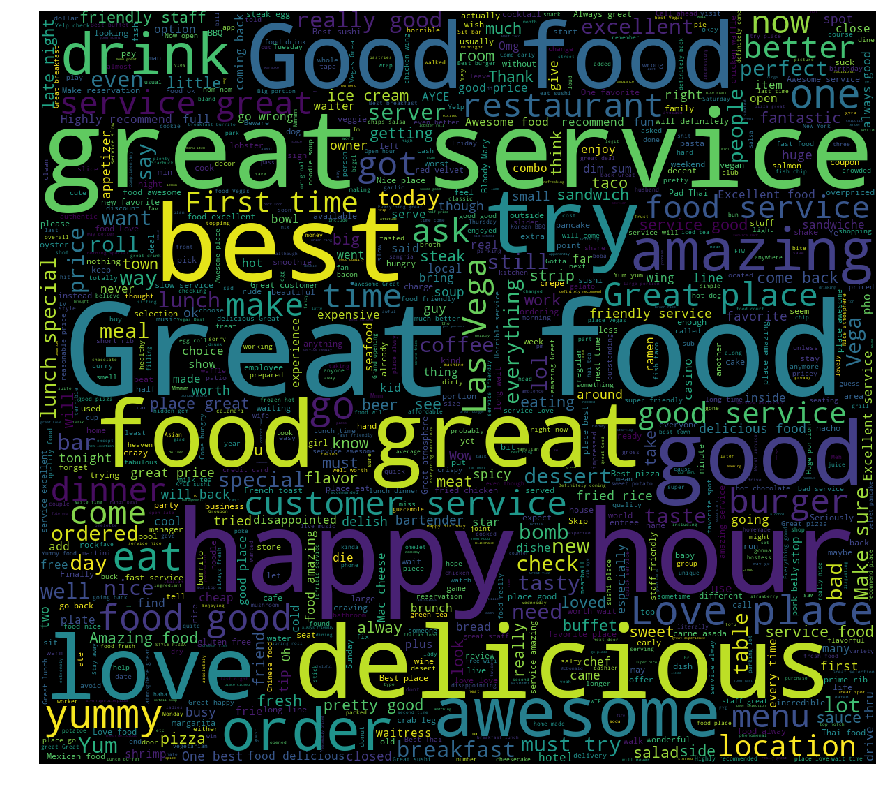

In [145]:
cloud = WordCloud(width=1200, height= 1080,max_words= 1000).generate(' '.join(tip1['user_tips'].astype(str)))
plt.figure(figsize=(15, 25))
plt.imshow(cloud)
plt.axis('off');